## Assessment Title: Integrated CA

## Lecturer Name: David McQuaid & Muhammad Iqbal

## Student Full Name & Student ID: Deniz OZSOY UGUR - 2023195

## IRELAND FUTURE YEARS RAINFALL FORECAST WITH DEEP LEARNING

### Link to Dataset

https://data.gov.ie/dataset/dublin-ringsend-rainfall-data?package_type=dataset

### GitHub Repository: 

CCT-Dublin Link:

https://github.com/CCT-Dublin/adv-data-big-data-ft-ca1-denizozsoyugur

The link used since the beginning of the project:

https://github.com/denizozsoyugur/2023195_Integrated_CA

## Inital Data Processing

In [2]:
#pip install statsmodels

In [3]:
#pip install pandas matplotlib

In [4]:
#pip install dash dash-core-components dash-html-components dash-table plotly

In [5]:
#pip install dash-bootstrap-components

In [6]:
#pip install plotly

In [7]:
#pip install numpy

In [8]:
#pip install pandas

In [9]:
#pip install pmdarima

In [10]:
#pip install --upgrade transformers

In [11]:
#pip install numpy==1.24.0

In [11]:
# Import NumPy, Pandas, Matplotlib, Seaborn libraries and Plotly Express

import numpy as np
import pandas as pd
import plotly.express as px
import calendar

from dateutil.parser import parse 
import matplotlib as mpl

from pyspark import SparkConf
from pyspark.conf import SparkConf

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import dash
from dash.dependencies import Input, Output
from sklearn.metrics import mean_squared_error
import plotly.express as px
from dash import Dash, dcc, html
from pyspark.sql.functions import col

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
# Import warnings and apply filterwarnings to ignore them.

import warnings
warnings.filterwarnings('ignore')

In [14]:
spark = SparkSession.builder \
    .appName("MySpark") \
    .getOrCreate()

24/04/06 15:37:53 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [15]:
df = spark.read.csv("file:///home/hduser/Desktop/irish_monthly_rainy_weather .csv", header = True, inferSchema = True)

In [16]:
df.show()

+----+-----+---+-----+----+---+---+
|year|month|ind| rain| gdf| rd| wd|
+----+-----+---+-----+----+---+---+
|1941|    1|  0|112.8|  13| 18| 18|
|1941|    2|  0| 69.5|  13| 22| 15|
|1941|    3|  0|  111|  50| 21| 13|
|1941|    4|  0| 68.6|16.5| 15| 12|
|1941|    5|  0| 66.4|20.1| 13| 10|
|1941|    6|  0| 13.6| 3.8|  5|  4|
|1941|    7|  0| 33.4| 6.6| 14| 10|
|1941|    8|  0| 58.2| 6.6| 22| 17|
|1941|    9|  0| 19.6| 5.1| 10|  8|
|1941|   10|  0| 51.2|12.4| 17| 11|
|1941|   11|  0| 81.2|10.4| 26| 17|
|1941|   12|  0| 38.5|16.5| 18|  9|
|1942|    1|  0| 78.4|11.9| 22| 16|
|1942|    2|  0|   28| 9.4| 10|  8|
|1942|    3|  0| 60.3|10.9| 17| 13|
|1942|    4|  0|   30| 4.8| 12|  9|
|1942|    5|  0| 72.8|10.2| 20| 16|
|1942|    6|  0|  4.6| 3.3|  3|  1|
|1942|    7|  0| 51.3|16.5| 17| 14|
|1942|    8|  0| 85.3|17.3| 21| 14|
+----+-----+---+-----+----+---+---+
only showing top 20 rows



## Explanation of Abbreviations

In [17]:
df = df.withColumnRenamed("year","Year").withColumnRenamed("month","Month").withColumnRenamed("rain","Precipitation_Amount").withColumnRenamed("gdf","Greatest_Daily_Fall").withColumnRenamed("rd","Number_of_Rain_Days").withColumnRenamed("wd","Number_of_Wet_Days")

In [18]:
df.show(2)

+----+-----+---+--------------------+-------------------+-------------------+------------------+
|Year|Month|ind|Precipitation_Amount|Greatest_Daily_Fall|Number_of_Rain_Days|Number_of_Wet_Days|
+----+-----+---+--------------------+-------------------+-------------------+------------------+
|1941|    1|  0|               112.8|                 13|                 18|                18|
|1941|    2|  0|                69.5|                 13|                 22|                15|
+----+-----+---+--------------------+-------------------+-------------------+------------------+
only showing top 2 rows



In [19]:
cols_to_convert = ['Year','Month','Precipitation_Amount',
                   'Greatest_Daily_Fall',
                   'Number_of_Rain_Days','Number_of_Wet_Days']

In [20]:
for col_name in cols_to_convert:
    df = df.withColumn(col_name, col(col_name).cast("float"))

df = df.fillna(0, subset=cols_to_convert)

df.show()

+------+-----+---+--------------------+-------------------+-------------------+------------------+
|  Year|Month|ind|Precipitation_Amount|Greatest_Daily_Fall|Number_of_Rain_Days|Number_of_Wet_Days|
+------+-----+---+--------------------+-------------------+-------------------+------------------+
|1941.0|  1.0|  0|               112.8|               13.0|               18.0|              18.0|
|1941.0|  2.0|  0|                69.5|               13.0|               22.0|              15.0|
|1941.0|  3.0|  0|               111.0|               50.0|               21.0|              13.0|
|1941.0|  4.0|  0|                68.6|               16.5|               15.0|              12.0|
|1941.0|  5.0|  0|                66.4|               20.1|               13.0|              10.0|
|1941.0|  6.0|  0|                13.6|                3.8|                5.0|               4.0|
|1941.0|  7.0|  0|                33.4|                6.6|               14.0|              10.0|
|1941.0|  

In [21]:
column_to_drop = "ind"

df = df.drop(column_to_drop)

df.show(2)

+------+-----+--------------------+-------------------+-------------------+------------------+
|  Year|Month|Precipitation_Amount|Greatest_Daily_Fall|Number_of_Rain_Days|Number_of_Wet_Days|
+------+-----+--------------------+-------------------+-------------------+------------------+
|1941.0|  1.0|               112.8|               13.0|               18.0|              18.0|
|1941.0|  2.0|                69.5|               13.0|               22.0|              15.0|
+------+-----+--------------------+-------------------+-------------------+------------------+
only showing top 2 rows



In [22]:
from pyspark.sql.types import IntegerType

for col_name in cols_to_convert:
    df = df.withColumn(col_name, df[col_name].cast(IntegerType()))

df.show(2)

+----+-----+--------------------+-------------------+-------------------+------------------+
|Year|Month|Precipitation_Amount|Greatest_Daily_Fall|Number_of_Rain_Days|Number_of_Wet_Days|
+----+-----+--------------------+-------------------+-------------------+------------------+
|1941|    1|                 112|                 13|                 18|                18|
|1941|    2|                  69|                 13|                 22|                15|
+----+-----+--------------------+-------------------+-------------------+------------------+
only showing top 2 rows



In [23]:
from datetime import datetime
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

def format_date(year, month):

    date_str = f"{year:04d}-{month:02d}-01"
    date_obj = datetime.strptime(date_str, "%Y-%m-%d")
    formatted_date = date_obj.strftime("%a %b %d %Y")
    return formatted_date

udf_format_date = udf(format_date, StringType())

df = df.withColumn("new_date", udf_format_date(df["Year"], df["Month"]))

df.show()

+----+-----+--------------------+-------------------+-------------------+------------------+---------------+
|Year|Month|Precipitation_Amount|Greatest_Daily_Fall|Number_of_Rain_Days|Number_of_Wet_Days|       new_date|
+----+-----+--------------------+-------------------+-------------------+------------------+---------------+
|1941|    1|                 112|                 13|                 18|                18|Wed Jan 01 1941|
|1941|    2|                  69|                 13|                 22|                15|Sat Feb 01 1941|
|1941|    3|                 111|                 50|                 21|                13|Sat Mar 01 1941|
|1941|    4|                  68|                 16|                 15|                12|Tue Apr 01 1941|
|1941|    5|                  66|                 20|                 13|                10|Thu May 01 1941|
|1941|    6|                  13|                  3|                  5|                 4|Sun Jun 01 1941|
|1941|    7|       

In [24]:
df1 = df.select("new_date", "Precipitation_Amount")

In [25]:
df1.show(2)

+---------------+--------------------+
|       new_date|Precipitation_Amount|
+---------------+--------------------+
|Wed Jan 01 1941|                 112|
|Sat Feb 01 1941|                  69|
+---------------+--------------------+
only showing top 2 rows



In [26]:
pandas_df = df1.limit(10).toPandas()

In [27]:
# Check the top 10 rows
pandas_df.head()

,new_date,Precipitation_Amount
0,Wed Jan 01 1941,112
1,Sat Feb 01 1941,69
2,Sat Mar 01 1941,111
3,Tue Apr 01 1941,68
4,Thu May 01 1941,66


In [28]:
# End the current spark session
spark.stop()

## Time Series Forecasting

In [29]:
df = pd.read_csv('/home/hduser/Desktop/irish_monthly_rainy_weather .csv')
df.head()

,year,month,ind,rain,gdf,rd,wd
0,1941,1,0,112.8,13,18,18
1,1941,2,0,69.5,13,22,15
2,1941,3,0,111,50,21,13
3,1941,4,0,68.6,16.5,15,12
4,1941,5,0,66.4,20.1,13,10


In [30]:
missing_values = ['/',' ','-','--','na','Na','n/a','NA','n.a.','?','nan','Nan','nul','Nul','null','Null']

df= pd.read_csv('/home/hduser/Desktop/irish_monthly_rainy_weather .csv',na_values=missing_values)

# Create a list with all the possible missing value formats. Create a name for the dataframe as report
# ('irish_monthly_rainy_weather')and apply the pd.read_csv function 
# Include the variable 'na_values' and define it with the 'missing values' list previously created

In [31]:
df.isnull().sum()

# Check missing values by applying the .isnull().sum method to the dataframe

year       0
month      0
ind        0
rain      50
gdf      104
rd        91
wd        91
dtype: int64

In [32]:
fill_value = 0  # Eksik değerleri 0 ile doldurmak için
df['rain'] = df['rain'].fillna(fill_value)
df['gdf'] = df['gdf'].fillna(fill_value)
df['rd'] = df['rd'].fillna(fill_value)
df['wd'] = df['wd'].fillna(fill_value)

In [33]:
df.isnull().sum() / len(df) * 100

# Check missing values by applying the .isnull().sum method to the dataframe and divide it by the length of the dataframe,
# calculated with the len() function. Then, multiply the result * 100 to obtain a percentage

year     0.0
month    0.0
ind      0.0
rain     0.0
gdf      0.0
rd       0.0
wd       0.0
dtype: float64

In [34]:
df.columns

# Check the column names of the dataframe by applying the .columns attribute

Index(['year', 'month', 'ind', 'rain', 'gdf', 'rd', 'wd'], dtype='object')

In [35]:
df.rename(columns={'year':'Year', 
                   'month':'Month', 'ind':'Indicator','rain':'Precipitation_Amount','gdf':'Greatest_Daily_Fall',
                   'rd':'Number_of_Rainy_Days', 'wd':'Number_of_Wet_Days'}, inplace=True)

# Rename the columns of the dataframe by applying the .rename() method

In [36]:
df.drop(columns=["Indicator"], inplace=True)

# Apply .drop() to remove the column as it contains the same index values

In [37]:
# I am creating a list of the columns to convert. These columns currently contain an object data type
# and missing values. To convert them, missing values will be replaced with '0'. Afterwards,
# the values will be converted from object to numeric to utilise all the features that apply to numeric data types

cols_to_convert = ['Year','Month','Precipitation_Amount',
                   'Greatest_Daily_Fall',
                   'Number_of_Rainy_Days','Number_of_Wet_Days']

In [38]:
df.isnull().sum()

Year                    0
Month                   0
Precipitation_Amount    0
Greatest_Daily_Fall     0
Number_of_Rainy_Days    0
Number_of_Wet_Days      0
dtype: int64

In [39]:
fill_value = 0  
df['Precipitation_Amount'] = df['Precipitation_Amount'].fillna(fill_value)
df['Greatest_Daily_Fall'] = df['Greatest_Daily_Fall'].fillna(fill_value)
df['Number_of_Rainy_Days'] = df['Number_of_Rainy_Days'].fillna(fill_value)
df['Number_of_Wet_Days'] = df['Number_of_Wet_Days'].fillna(fill_value)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  963 non-null    int64  
 1   Month                 963 non-null    int64  
 2   Precipitation_Amount  963 non-null    float64
 3   Greatest_Daily_Fall   963 non-null    float64
 4   Number_of_Rainy_Days  963 non-null    float64
 5   Number_of_Wet_Days    963 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 45.3 KB


### Let's observe the course of data by month from 1941 to 2023.

In [41]:
df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month']. astype(str), format='%Y-%m')

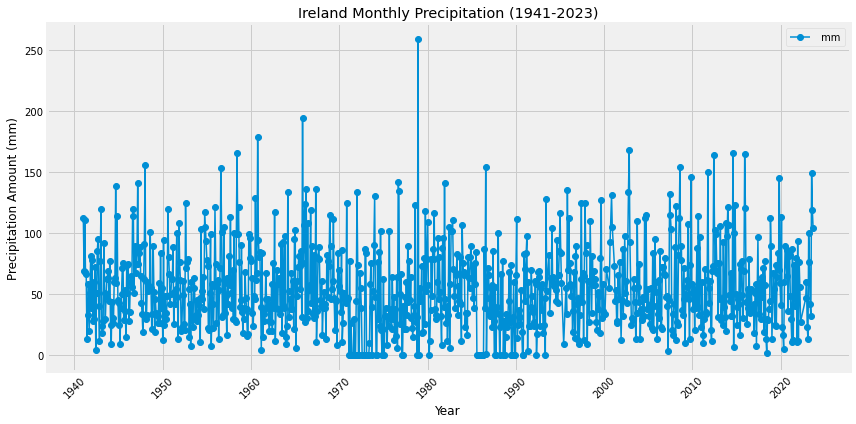

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'].values, df['Precipitation_Amount'].values, label=' mm', marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Precipitation Amount (mm)')
plt.title('Ireland Monthly Precipitation (1941-2023)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
df['Number_of_Rainy_Days'] = df['Number_of_Rainy_Days'].fillna(0)
df['Number_of_Rainy_Days'] = pd.to_numeric(df['Number_of_Rainy_Days'], errors='coerce')

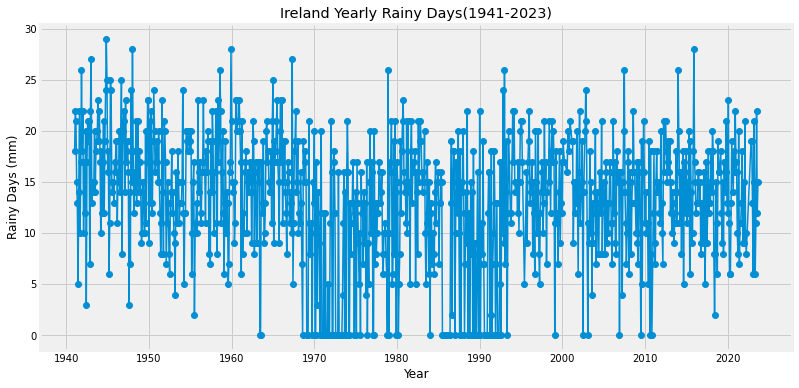

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'].to_numpy(), df['Number_of_Rainy_Days'].to_numpy(), label=' mm', marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Rainy Days (mm)')
plt.title('Ireland Yearly Rainy Days(1941-2023)')
plt.show()

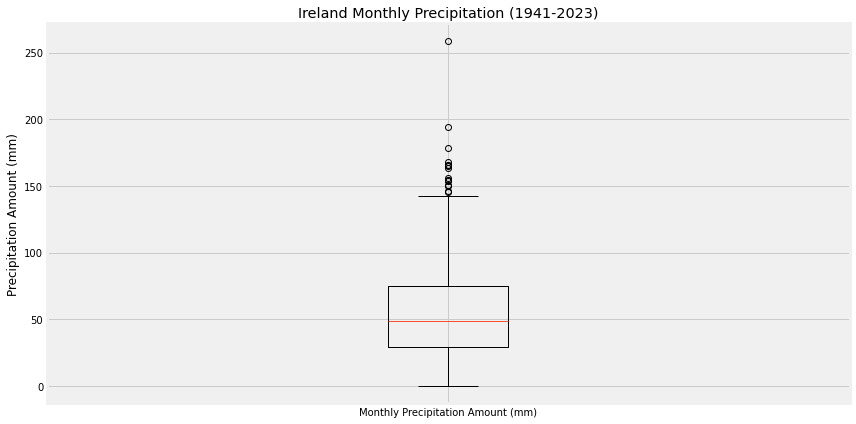

In [45]:
plt.figure(figsize=(12,6))
plt.boxplot(df['Precipitation_Amount'], labels=['Monthly Precipitation Amount (mm)'])

plt.ylabel('Precipitation Amount (mm)')
plt.title('Ireland Monthly Precipitation (1941-2023)')

plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
#Checking the description of data in our dataframe
df.describe()

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days,date
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963
mean,1981.166147,6.484943,54.219315,13.669367,13.149533,9.471443,1981-08-15 13:25:58.878504704
min,1941.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1941-01-01 00:00:00
25%,1961.000000,3.000000,29.600000,7.000000,10.000000,6.000000,1961-01-16 12:00:00
50%,1981.000000,6.000000,48.800000,11.800000,14.000000,10.000000,1981-02-01 00:00:00
75%,2002.000000,9.500000,74.700000,18.750000,17.500000,13.000000,2002-10-16 12:00:00
max,2023.000000,12.000000,259.000000,80.000000,29.000000,24.000000,2023-09-01 00:00:00
std,23.848870,3.462380,34.966843,10.475196,6.335268,5.036041,NaN


In [47]:
#pip install seaborn

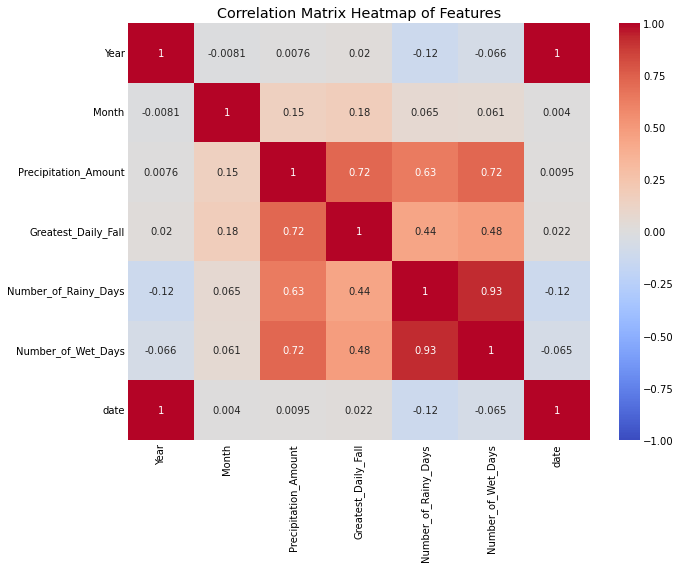

In [48]:
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap of Features')
plt.tight_layout()
plt.show()

There is no specific correlation between the relevant data, accordingly we can make predictions with year data. The dependent variable 'Precipitation Amount' column was chosen as there is no correlation between the data and in order to make a more accurate prediction.

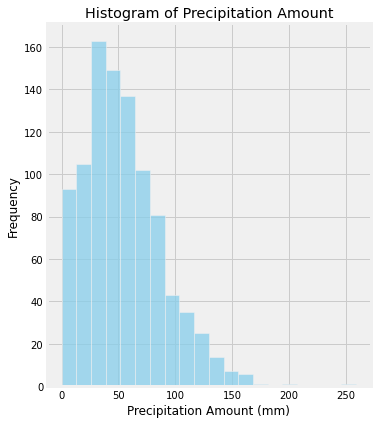

In [49]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Precipitation_Amount'], bins=20, kde=False, color='skyblue')
plt.xlabel('Precipitation Amount (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Precipitation Amount')

plt.tight_layout()
plt.show()

In [50]:
df['Year_Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)

max_rain_per_year = df.groupby('Year')['Precipitation_Amount'].idxmax()

max_rain_months = df.loc[max_rain_per_year, ['Year', 'Month', 'Precipitation_Amount']]

max_rain_months.reset_index(drop=True, inplace=True)

In [51]:
max_rain_months.to_csv('max_rain_months.csv', index=False)

In [52]:
max_rain_months.head(5)

,Year,Month,Precipitation_Amount
0,1941,1,112.8
1,1942,9,95.1
2,1943,1,120.1
3,1944,9,138.4
4,1945,7,75.3


In [53]:
max_rain_months.shape

(83, 3)

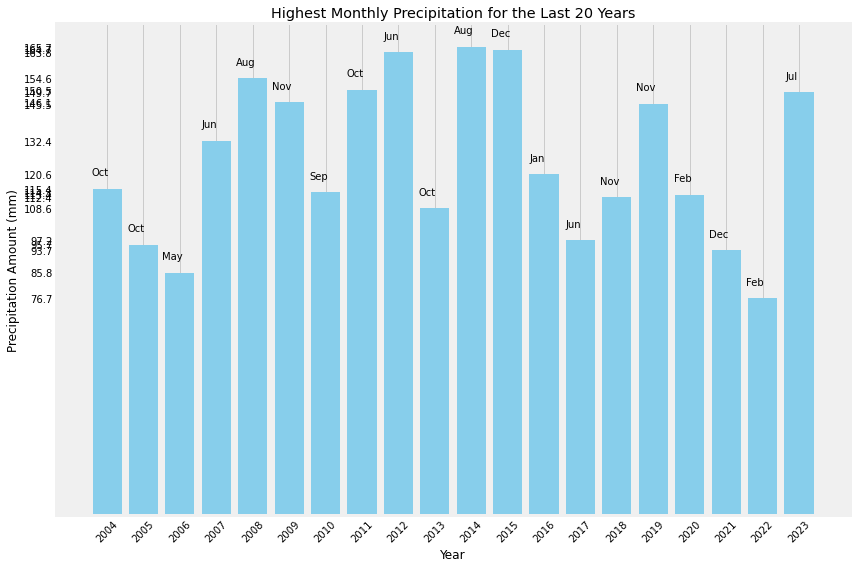

In [54]:
dfm = pd.read_csv('max_rain_months.csv')
dfm_last_20_years = dfm[dfm['Year'] >= 2004]

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

dfm_last_20_years['Month'] = dfm_last_20_years['Month'].apply(lambda x: month_names[int(x) - 1])

max_rain_months = dfm_last_20_years.groupby('Year')['Month'].first().reset_index()

plt.figure(figsize=(12,8))

bars = plt.bar(dfm_last_20_years['Year'].astype(str), dfm_last_20_years['Precipitation_Amount'], color='skyblue')

for i, bar in enumerate(bars):
    if max_rain_months['Month'].iloc[i] in month_names:
        month_idx = month_names.index(max_rain_months['Month'].iloc[i])
        month_abbr = calendar.month_abbr[month_idx + 1]
        plt.text(bar.get_x() + bar.get_width()/2 - 0.2, bar.get_height() + 4,
                 month_abbr, ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Year')
plt.ylabel('Precipitation Amount (mm)')
plt.title('Highest Monthly Precipitation for the Last 20 Years')
plt.xticks(rotation=45)
plt.yticks(dfm_last_20_years['Precipitation_Amount'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Precipitation is shown over rolling 31-day periods centered on each day of the year to show not only monthly totals but also variation within months. There is some seasonal variation in monthly rainfall in Dublin.

Rainfall throughout the year in Dublin. We can say that the rainiest months in the Dublin region are,June, July, August.

The least rainy month in Dublin is April. We can't see this month on the chart.

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [56]:
df.head(2)

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days,date,Year_Month
0,1941,1,112.8,13.0,18.0,18.0,1941-01-01,1941-1
1,1941,2,69.5,13.0,22.0,15.0,1941-02-01,1941-2


We are preparing the dataset as a data set in which only the years and Precipitation Amount data are arranged and all the data can be used. In future studies, the data set will be selected according to the situation that is desired to be examined with this data set.

In [57]:
#Accordingly, we change the dates according to usage style.

import datetime

df['date'] = pd.to_datetime(df['date'])

df['new_date'] = df['date'].dt.strftime('%a %b %d %Y')

print(df)

     Year  Month  Precipitation_Amount  Greatest_Daily_Fall  \
0    1941      1                 112.8                 13.0   
1    1941      2                  69.5                 13.0   
2    1941      3                 111.0                 50.0   
3    1941      4                  68.6                 16.5   
4    1941      5                  66.4                 20.1   
..    ...    ...                   ...                  ...   
958  2023      5                  42.1                 16.7   
959  2023      6                  31.9                  8.3   
960  2023      7                 149.7                 25.2   
961  2023      8                 118.9                 35.0   
962  2023      9                 104.2                 18.5   

     Number_of_Rainy_Days  Number_of_Wet_Days       date Year_Month  \
0                    18.0                18.0 1941-01-01     1941-1   
1                    22.0                15.0 1941-02-01     1941-2   
2                    21.0     

In [58]:
df.head(2)

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days,date,Year_Month,new_date
0,1941,1,112.8,13.0,18.0,18.0,1941-01-01,1941-1,Wed Jan 01 1941
1,1941,2,69.5,13.0,22.0,15.0,1941-02-01,1941-2,Sat Feb 01 1941


In [59]:
df1= df.drop(["Year","Month","Greatest_Daily_Fall", "Number_of_Rainy_Days","Number_of_Wet_Days","date","Year_Month" ],axis=1)

In [60]:
df1.head(2)

,Precipitation_Amount,new_date
0,112.8,Wed Jan 01 1941
1,69.5,Sat Feb 01 1941


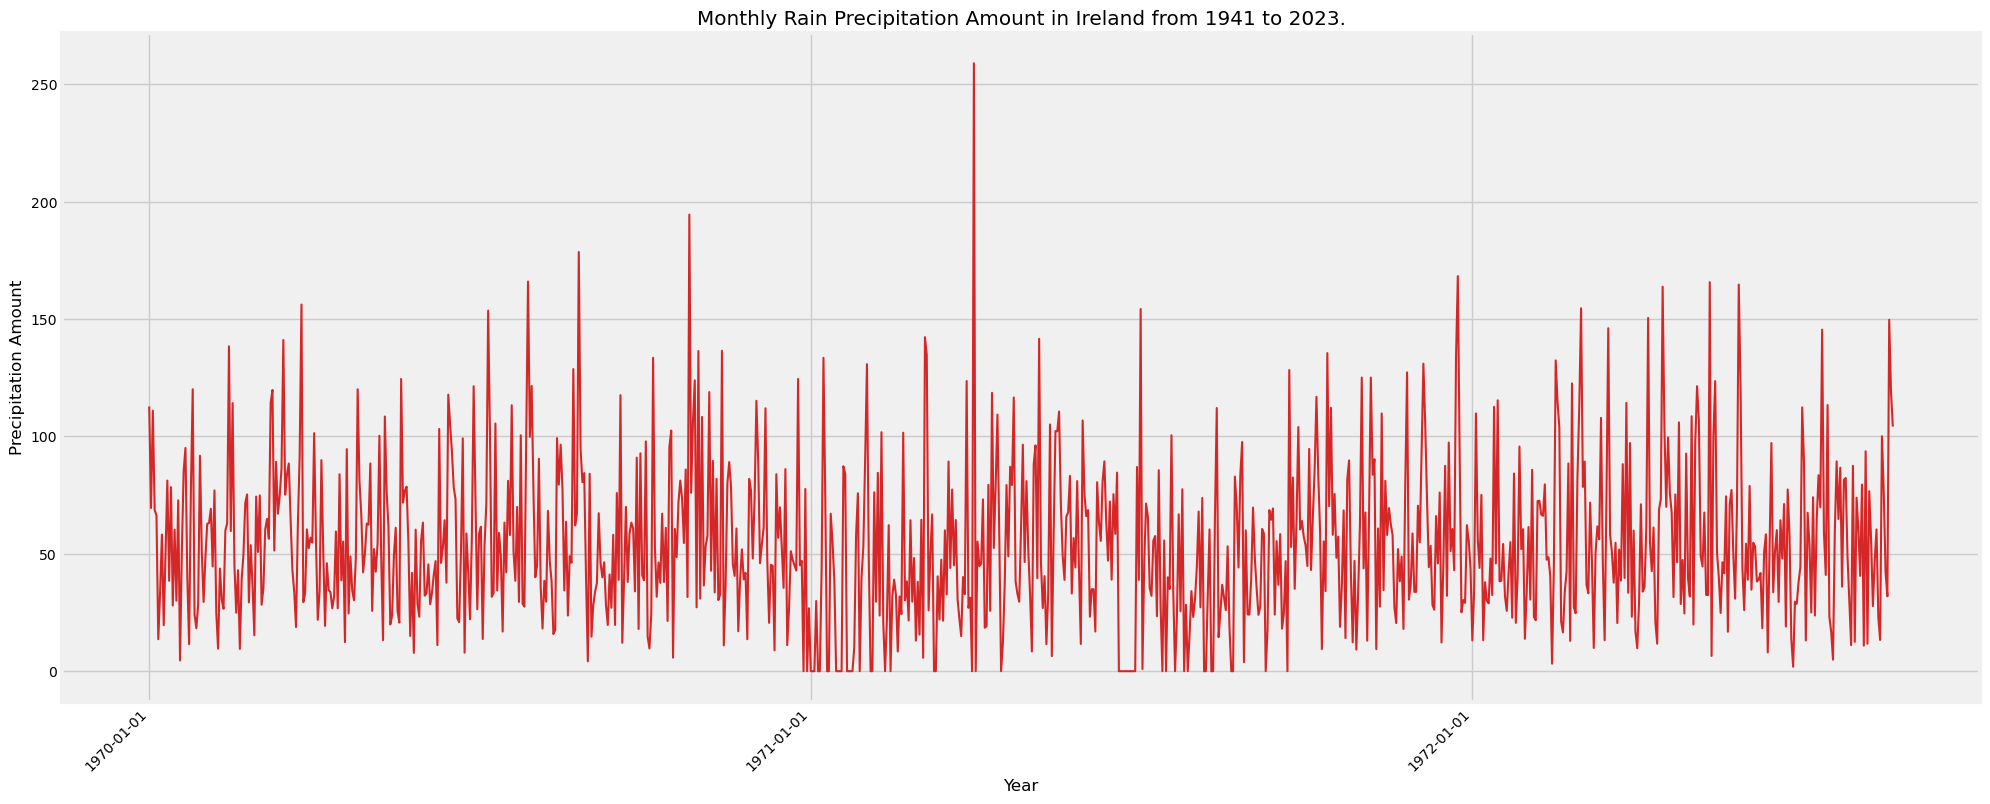

In [61]:
import matplotlib.dates as mdates
import matplotlib.dates as mdates 

def plot_df(df, x, y, title="", xlabel='Year', ylabel='Precipitation Amount', dpi=100):
    plt.figure(figsize=(20, 8), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gcf().autofmt_xdate()
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

x = df['new_date'].values
y = df['Precipitation_Amount'].values

plot_df(df, x=x, y=y, title='Monthly Rain Precipitation Amount in Ireland from 1941 to 2023.')

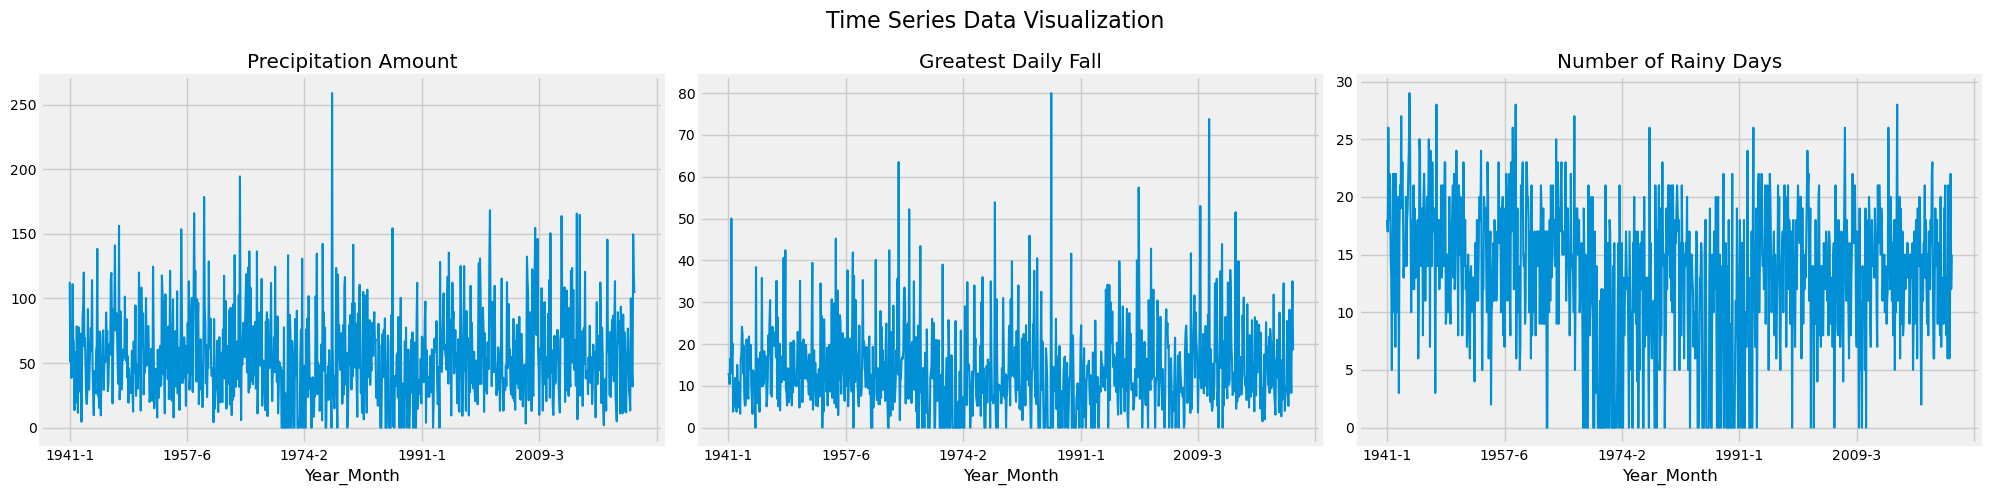

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), dpi=100)

df.groupby('Year_Month')['Precipitation_Amount'].mean().plot(title='Precipitation Amount', legend=False, ax=axes[0])

df.groupby('Year_Month')['Greatest_Daily_Fall'].mean().plot(title='Greatest Daily Fall', legend=False, ax=axes[1])

df.groupby('Year_Month')['Number_of_Rainy_Days'].mean().plot(title='Number of Rainy Days', legend=False, ax=axes[2])

plt.suptitle('Time Series Data Visualization', fontsize=16)
plt.tight_layout()
plt.show()

array([[<AxesSubplot:title={'center':'Precipitation_Amount'}>]],
      dtype=object)

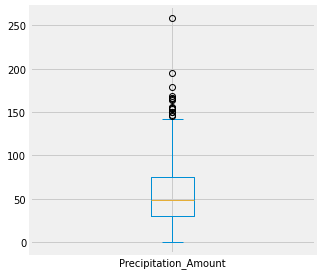

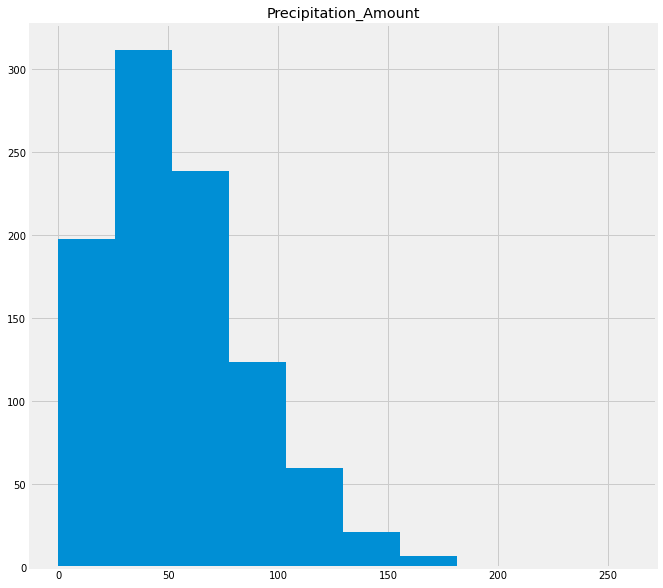

In [63]:
# Check the columns of the dataframe
df1.columns

# Check the datatypes of the columns
df1.dtypes

# Check the missing values
df1.isnull().sum()

# Check the unique values of the columns
df1.nunique()

# Check the value counts of the columns
df1['Precipitation_Amount'].value_counts()

# Check the percentage of the value counts of the columns
df1['Precipitation_Amount'].value_counts(normalize=True)

# Check the summary statistics of the dataframe
df1.describe(include='all')

# Check the outliers
df1.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,10))

# Check the distribution of the columns
df1.hist(figsize=(10,10))

In [64]:
# Convert the full_date column to datetime datatype
df1['new_date'] = pd.to_datetime(df1['new_date'])

In [65]:
# Print the rows of the dataframe where the Precipitation_Amount is Null
df1[df1['Precipitation_Amount'].isnull()]      

,Precipitation_Amount,new_date


In [66]:
# Group the dataframe by new_date and calculate the mean of the Precipitation_Amount
df1 = df1.groupby('new_date').mean().reset_index()

In [67]:
# Check the dataframe
print(df1.head(3))
print(df1.tail(3))

    new_date  Precipitation_Amount
0 1941-01-01                 112.8
1 1941-02-01                  69.5
2 1941-03-01                 111.0
      new_date  Precipitation_Amount
960 2023-07-01                 149.7
961 2023-08-01                 118.9
962 2023-09-01                 104.2


In [68]:
# Find the missing dates in the dataframe and insert them, leaving the Precipitation_Amount column as Null
idx = pd.date_range('1941-01-01', '2023-09-01')
df1 = df1.set_index('new_date').reindex(idx).rename_axis('new_date').reset_index()

# Check the dataframe
print(df1.head(3))

    new_date  Precipitation_Amount
0 1941-01-01                 112.8
1 1941-01-02                   NaN
2 1941-01-03                   NaN


In [69]:
# Fill in the null values using interpolation
df1['Precipitation_Amount'] = df1['Precipitation_Amount'].interpolate(method='linear')

Shape: 
(30194, 2)

Columns: 
Index(['new_date', 'Precipitation_Amount'], dtype='object')

Data Types: 
new_date                datetime64[ns]
Precipitation_Amount           float64
dtype: object

Missing Values: 
new_date                0
Precipitation_Amount    0
dtype: int64

Unique Values: 
new_date                30194
Precipitation_Amount    24380
dtype: int64

Value Counts: 
Precipitation_Amount
0.000000      754
33.800000      35
34.900000      35
48.000000      11
54.000000       9
             ... 
45.132258       1
45.145161       1
45.158065       1
45.183871       1
104.200000      1
Name: count, Length: 24380, dtype: int64

Percentage of Value Counts: 
Precipitation_Amount
0.000000      0.024972
33.800000     0.001159
34.900000     0.001159
48.000000     0.000364
54.000000     0.000298
                ...   
45.132258     0.000033
45.145161     0.000033
45.158065     0.000033
45.183871     0.000033
104.200000    0.000033
Name: proportion, Length: 24380, dtype: float64

Su

Precipitation_Amount    AxesSubplot(0.08,0.536818;0.395455x0.343182)
dtype: object

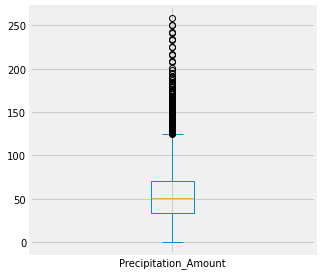

In [70]:
# Perform EDA on the df1 

print("Shape: ")
print(df1.shape)
print("\n" + "Columns: ")
print(df1.columns)
print("\n" + "Data Types: ")
print(df1.dtypes)
print("\n" + "Missing Values: ")
print(df1.isnull().sum())
print("\n" + "Unique Values: ")
print(df1.nunique())
print("\n" + "Value Counts: ")
print(df1['Precipitation_Amount'].value_counts())
print("\n" + "Percentage of Value Counts: ")
print(df1['Precipitation_Amount'].value_counts(normalize=True))
print("\n" + "Summary Statistics: ")
df1.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,10))

In [71]:
# Describe the df1

df1.describe(include='all')

,new_date,Precipitation_Amount
count,30194,30194.000000
mean,1982-05-02 12:00:00.000000064,54.279557
min,1941-01-01 00:00:00,0.000000
25%,1961-09-01 06:00:00,34.034677
50%,1982-05-02 12:00:00,50.720968
75%,2002-12-31 18:00:00,70.498387
max,2023-09-01 00:00:00,259.000000
std,NaN,29.156047


## Time Series Analysis

### Data Processing

In [72]:
from statsmodels.tsa.stattools import adfuller
# Create a function to check the stationarity of the time series
def check_stationarity(timeseries):
    
    # Calculate the rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # Plot the rolling statistics
    plt.figure(figsize=(20,10))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.xlabel('Date')
    plt.ylabel('Precipitation Amount')
    plt.title('Rolling Mean & Rolling Standard Deviation')
    date_index = timeseries.index
    plt.xticks(date_index, rotation=45)
    plt.legend()
    plt.show()
    
    # Perform the Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    df1test = adfuller(timeseries, autolag='AIC')
    df1output = pd.Series(df1test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in df1test[4].items():
        df1output['Critical Value (%s)'%key] = value
    print(df1output)
    
    # Print whether the time series is stationary or not, based on the p-value
    if df1output[1] <= 0.05:
        print('The time series is stationary.')
    else:
        print('The time series is not stationary.')  

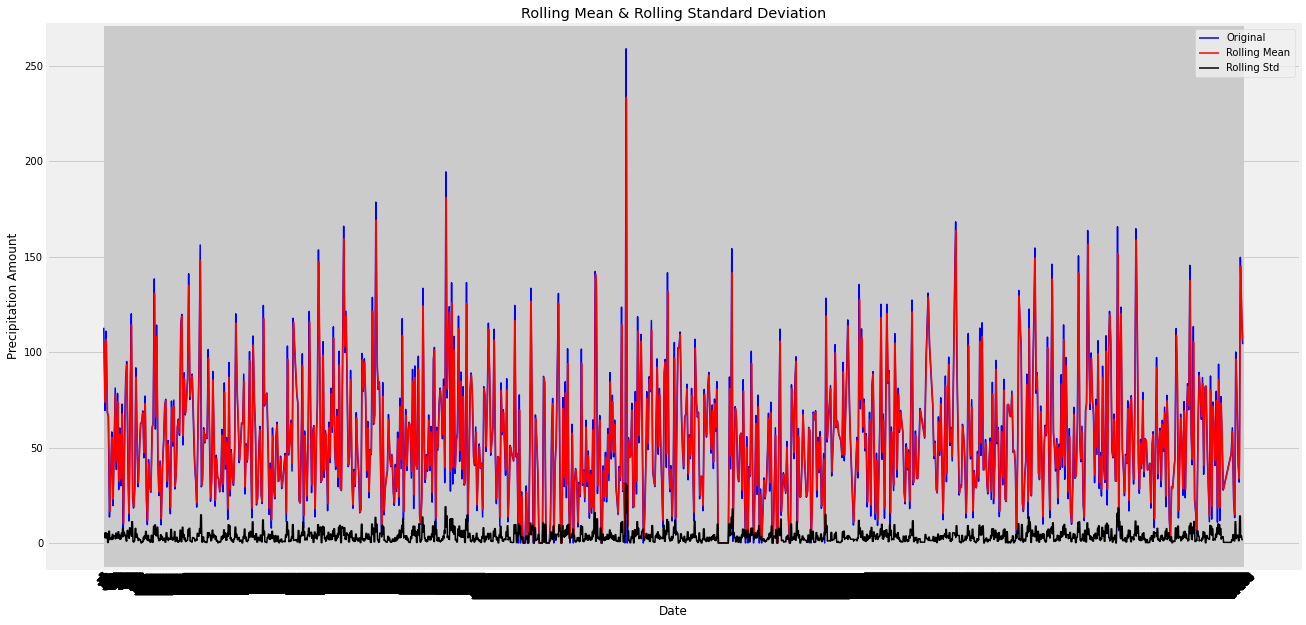

Results of Dickey-Fuller Test:
Test Statistic                -1.501905e+01
p-value                        1.028751e-27
#Lags Used                     5.100000e+01
Number of Observations Used    3.014200e+04
Critical Value (1%)           -3.430567e+00
Critical Value (5%)           -2.861636e+00
Critical Value (10%)          -2.566821e+00
dtype: float64
The time series is stationary.


In [73]:
# Check the stationarity of the time series
check_stationarity(df1['Precipitation_Amount'])

According to the Dickey-Fuller unit root test results, we can conclude that your data set is stationary. This means that the time series exhibits statistically stable behavior and there is no particular trend or fluctuation over time. We can use these results in future modeling and forecasting studies to ensure that the stationarity assumption is met.

In [74]:
from statsmodels.tsa.stattools import kpss
# KPSS Test
def kpss_test(timeseries):
    print('KPSS Test:')
    result = kpss(timeseries, regression='c', nlags='auto')
    labels = ['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations']
    for value, label in zip(result, labels):
        print(label + ': ' + str(value))
    if result[1] <= 0.05:
        print("Result: The time series is non-stationary as the p-value is less than the significance level (0.05).")
    else:
        print("Result: The time series is stationary as the p-value is greater than the significance level (0.05).")

# Apply the test using the 'Precipitation_Amount' column
kpss_test(df1['Precipitation_Amount'])

KPSS Test:
Test Statistic: 0.3310856768231267
p-value: 0.1
Lags Used: 99
Number of Observations: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Result: The time series is stationary as the p-value is greater than the significance level (0.05).


/tmp/ipykernel_4069/2305898266.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(timeseries, regression='c', nlags='auto')


According to the KPSS test results, it can be said that the time series is stationary and does not contain any statistically significant change. This means that the time series remains constant around a certain mean and variance over time.

Since the time series is stationary, differentiating or any other method will not be used to make it stationary.

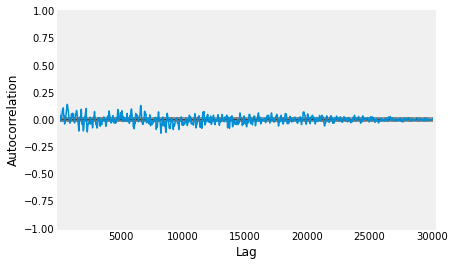

In [75]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df1['Precipitation_Amount'])
plt.show() 

## ARIMA MODEL

In [76]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df1['Precipitation_Amount'],order=(1,1,1))
model_fit=model.fit() 

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     Precipitation_Amount   No. Observations:                30194
Model:                   ARIMA(1, 1, 1)   Log Likelihood              -19505.269
Date:                  Sat, 06 Apr 2024   AIC                          39016.539
Time:                          15:40:35   BIC                          39041.485
Sample:                               0   HQIC                         39024.541
                                - 30194                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9490      0.004    250.557      0.000       0.942       0.956
ma.L1          0.0249      0.056      0.441      0.659      -0.086       0.136
sigma2         0.2131      0.001    372.605      0.000       0.212       0.214
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):          27420042.08
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -2.53
Prob(H) (two-sided):                  0.00   Kurtosis:                       150.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

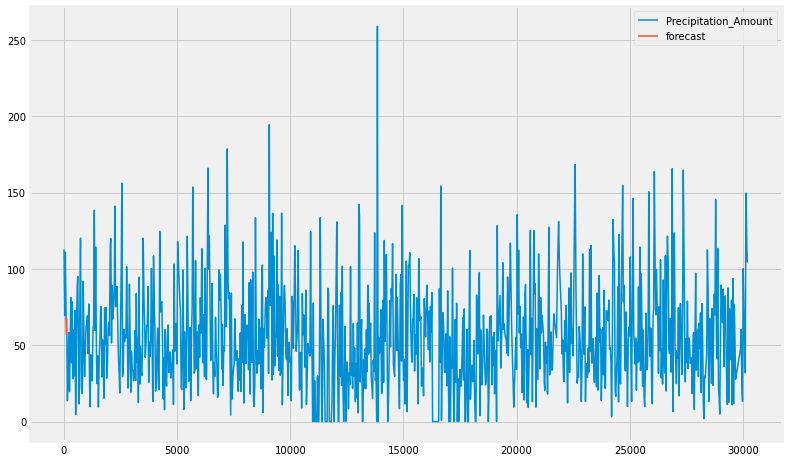

In [77]:
df1['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df1[['Precipitation_Amount','forecast']].plot(figsize=(12,8))

Here we can see that the prediction using ARIMA is not good as the time series shows seasonality.

In [78]:
# df2

Unfortunately, I could not use the relevant method due to the large amount of data in my dataset. I decided to reduce the dataset in order to deep dive and see the harmony between predictions and actual values. Accordingly, I will try to make predictions with the data of the last 20 years. First of all, I limit my dataset to the last 20 years.

In [79]:
current_year = pd.Timestamp.now().year

start_year = current_year - 20

df2 = df1[df1['new_date'].dt.year >= start_year]

print(df2)

        new_date  Precipitation_Amount  forecast
23010 2004-01-01             75.100000       NaN
23011 2004-01-02             73.103226       NaN
23012 2004-01-03             71.106452       NaN
23013 2004-01-04             69.109677       NaN
23014 2004-01-05             67.112903       NaN
...          ...                   ...       ...
30189 2023-08-28            106.096774       NaN
30190 2023-08-29            105.622581       NaN
30191 2023-08-30            105.148387       NaN
30192 2023-08-31            104.674194       NaN
30193 2023-09-01            104.200000       NaN

[7184 rows x 3 columns]


In [80]:
# Create a function to check the stationarity of the time series
def check_stationarity(timeseries):
    
    # Calculate the rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # Plot the rolling statistics
    plt.figure(figsize=(20,10))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.xlabel('Year')
    plt.ylabel('Precipitation Amount')
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Date format
    plt.show()
    
    # Perform the Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    df2test = adfuller(timeseries, autolag='AIC')
    df2output = pd.Series(df2test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in df2test[4].items():
        df2output['Critical Value (%s)'%key] = value
    print(df2output)
    
    # Print whether the time series is stationary or not, based on the p-value
    if df2output[1] <= 0.05:
        print('The time series is stationary.')
    else:
        print('The time series is not stationary.')

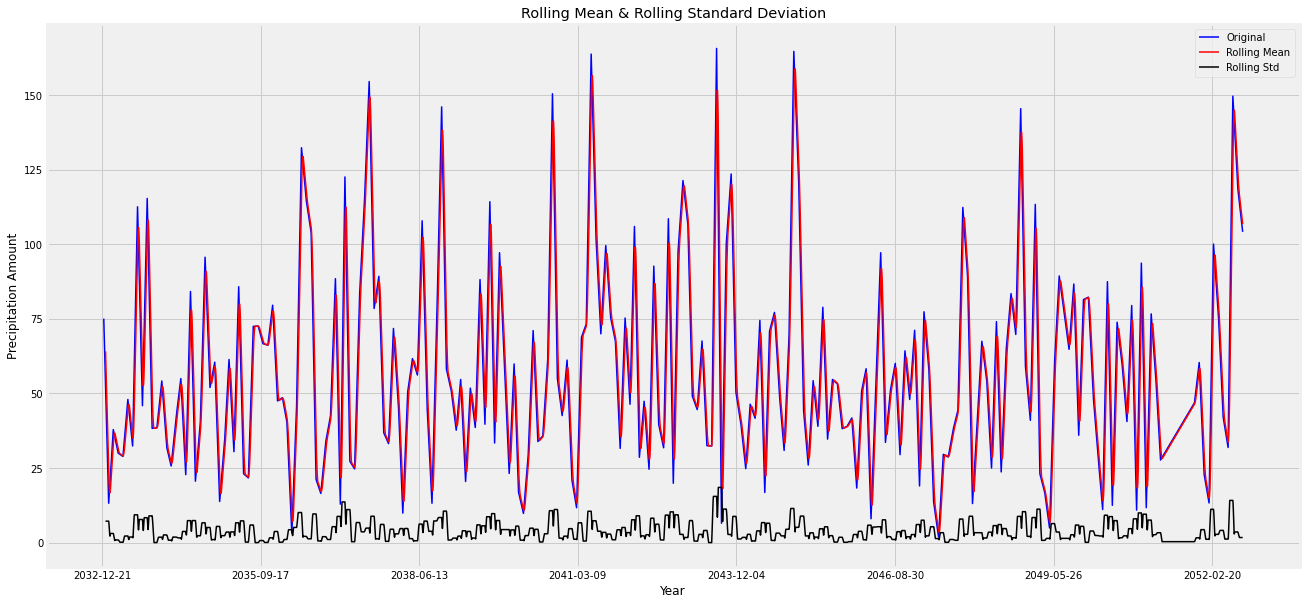

Results of Dickey-Fuller Test:
Test Statistic                -1.038840e+01
p-value                        2.051221e-18
#Lags Used                     3.300000e+01
Number of Observations Used    7.150000e+03
Critical Value (1%)           -3.431265e+00
Critical Value (5%)           -2.861944e+00
Critical Value (10%)          -2.566985e+00
dtype: float64
The time series is stationary.


In [81]:
# Check the stationarity of the time series
check_stationarity(df2['Precipitation_Amount'])

Since there are 12 months for each year, we can calculate the total number of months as:

Total Number of Months=(End Year−Start Year+1)×12Total Number of Months=(End Year−Start Year+1)×12

The data from 2003 to 2023:

Total Number of Months=(2023−2003+1)×12=21×12=252 months

Total Number of Periods=Total Number of Months/12Total Number of Periods=Total Number of Months/12

Total Number of Periods=252 months/12=21 periods

These calculations will provide the total number of months and the number of periods for the data from 2003 to 2023, given

that there are data for each of the 12 months of each year.

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df2['Precipitation_Amount'], period=21)

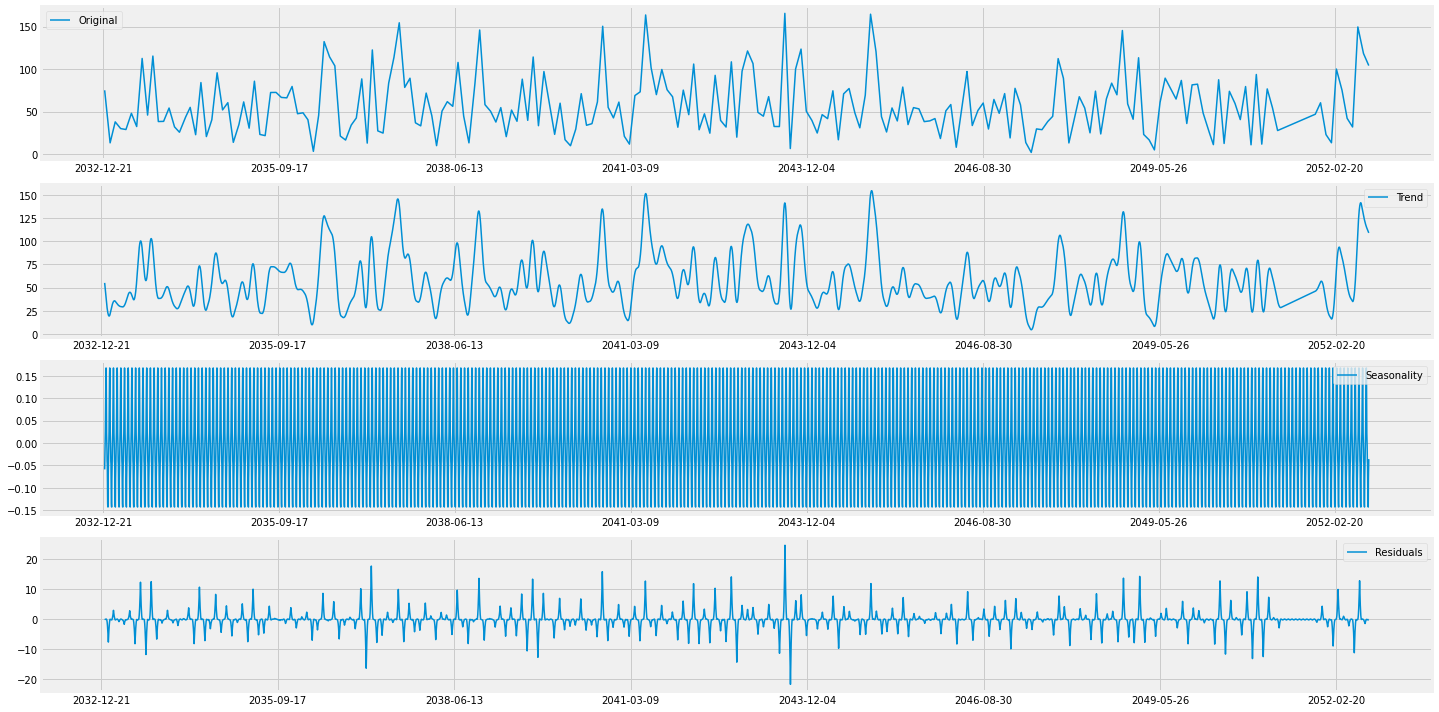

In [83]:
# Plot the original time series, the trend, the seasonality, and the residuals
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(df2['Precipitation_Amount'], label='Original')
plt.legend(loc='best')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.tight_layout()
plt.show()

In [84]:
# Create a fuction to plot the ACF and PACF plots
def plot_acf_pacf(timeseries):
    plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(acf(timeseries, nlags=20))
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.title('Autocorrelation Function')
    plt.subplot(212)
    plt.plot(pacf(timeseries, nlags=20))
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()
    plt.show()

In [85]:
from statsmodels.tsa.stattools import acf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

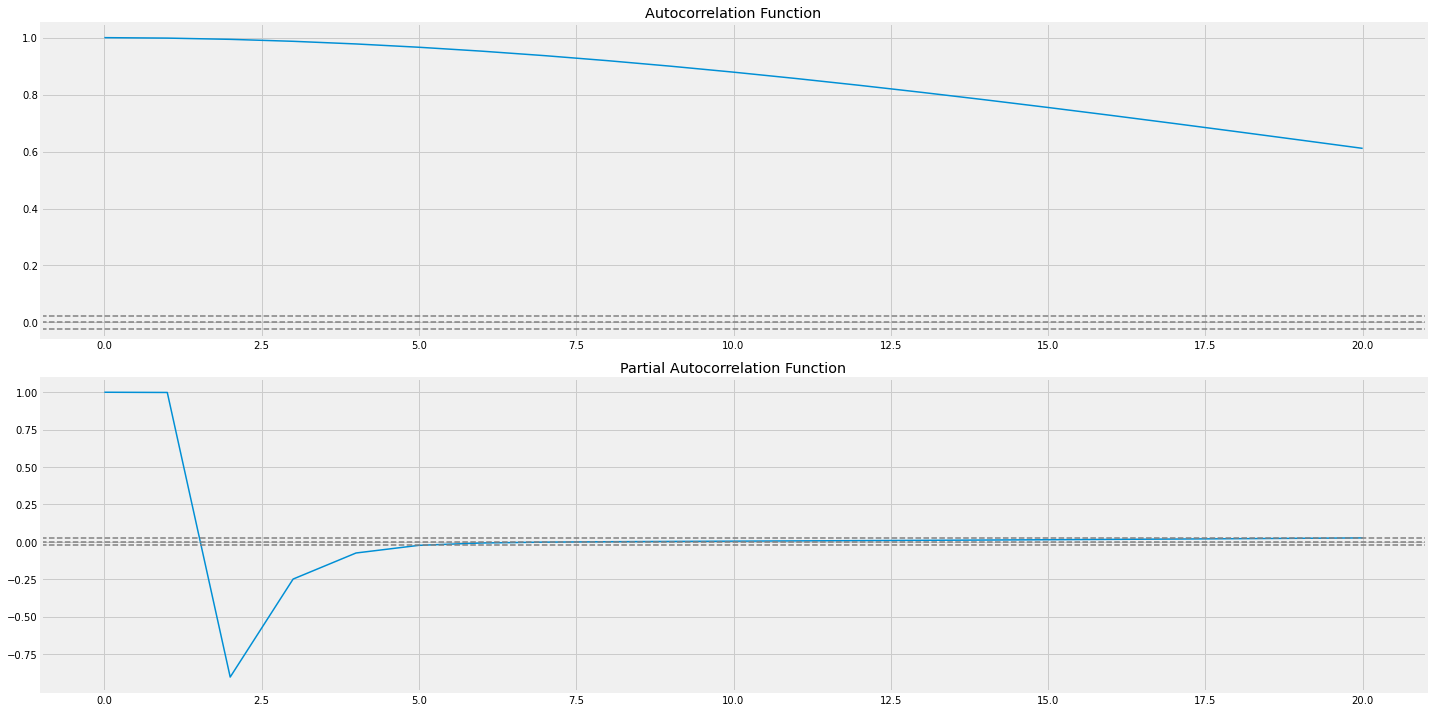

In [86]:
#Plot the ACF and PACF plots for the stationary time series columns
plot_acf_pacf(df2['Precipitation_Amount'])

In [87]:
print(adfuller(df2['Precipitation_Amount'])[1])

2.0512205065429024e-18


# df2 Arima Model

In [88]:
df2 = df1[['new_date', 'Precipitation_Amount']]

new_date                0
Precipitation_Amount    0
dtype: int64

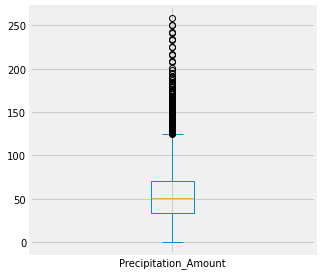

In [89]:
# Check the dataframe for outliers and missing values
df2.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,10))
df2.isnull().sum()

In [90]:
current_year = pd.Timestamp.now().year

start_year = current_year - 20

df2 = df1[df1['new_date'].dt.year >= start_year]

print(df2)

        new_date  Precipitation_Amount  forecast
23010 2004-01-01             75.100000       NaN
23011 2004-01-02             73.103226       NaN
23012 2004-01-03             71.106452       NaN
23013 2004-01-04             69.109677       NaN
23014 2004-01-05             67.112903       NaN
...          ...                   ...       ...
30189 2023-08-28            106.096774       NaN
30190 2023-08-29            105.622581       NaN
30191 2023-08-30            105.148387       NaN
30192 2023-08-31            104.674194       NaN
30193 2023-09-01            104.200000       NaN

[7184 rows x 3 columns]


In [91]:
# Check the dataframe
print(len(df2))
print(round(len(df2)*.8))
print(len(df2) - round(len(df2)*.8))

7184
5747
1437


In [92]:
df2.describe(include='all')

,new_date,Precipitation_Amount,forecast
count,7184,7184.000000,0.0
mean,2013-10-31 12:00:00,56.984020,NaN
min,2004-01-01 00:00:00,1.900000,NaN
25%,2008-11-30 18:00:00,36.834677,NaN
50%,2013-10-31 12:00:00,51.250000,NaN
75%,2018-10-01 06:00:00,72.263468,NaN
max,2023-09-01 00:00:00,165.700000,NaN
std,NaN,28.688296,NaN


(5747, 3)
(1437, 3)
Train dates : 23010 --- 28756  (n=5747)
Test dates  : 28757 --- 30193  (n=1437)


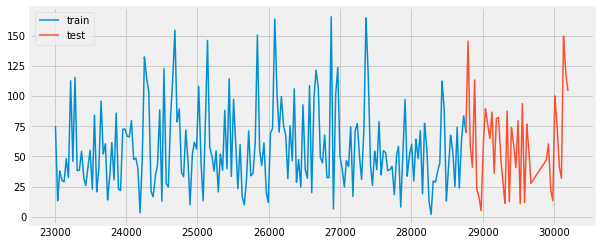

In [93]:
steps = 1437
train = df2[:-steps]
test  = df1[-steps:]

print(train.shape)
print(test.shape)

print(f"Train dates : {train.index.min()} --- {train.index.max()}  (n={len(train)})")
print(f"Test dates  : {test.index.min()} --- {test.index.max()}  (n={len(test)})")

fig, ax=plt.subplots(figsize=(9, 4))
train['Precipitation_Amount'].plot(ax=ax, label='train')
test['Precipitation_Amount'].plot(ax=ax, label='test')
ax.legend()


In [94]:
data = np.asarray(df2['Precipitation_Amount'])

model = ARIMA(data, order=(1, 1, 1))

model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 7184
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4739.904
Date:                Sat, 06 Apr 2024   AIC                           9485.807
Time:                        15:40:39   BIC                           9506.446
Sample:                             0   HQIC                          9492.910
                               - 7184                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9495      0.010     92.487      0.000       0.929       0.970
ma.L1          0.0246      0.154      0.160      0.873      -0.277       0.326
sigma2         0.2190      0.002    137.336      0.0

In [95]:
# Tune the ARIMA model
# Create a function to find the best ARIMA model
def find_best_arima_model(train, p_values, d_values, q_values):
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    model = ARIMA(train, order=order)
                    model_fit = model.fit()
                    aic = model_fit.aic
                    if aic < best_score:
                        best_score, best_cfg = aic, order
                    print('ARIMA%s AIC=%.3f' % (order, aic))
                except:
                    continue
    print('Best ARIMA%s AIC=%.3f' % (best_cfg, best_score))
    return best_cfg

In [96]:
import itertools
import statsmodels.api as sm

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_aic = np.inf
best_pdq = None

for param in pdq:
    try:
        model = sm.tsa.ARIMA(df2['Precipitation_Amount'], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

print("Best ARIMA{} AIC={}".format(best_pdq, best_aic))

/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored 

Best ARIMA(2, 0, 0) AIC=9292.82137796931


In [97]:
import itertools
import statsmodels.api as sm

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_aic = np.inf
best_pdq = None

for param in pdq:
    try:
        model = sm.tsa.ARIMA(df2['Precipitation_Amount'], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

print("Best ARIMA{} AIC={}".format(best_pdq, best_aic))

model = sm.tsa.ARIMA(df2['Precipitation_Amount'], order=best_pdq)
results = model.fit()
forecast = results.predict(start=0, end=len(df2)-1, typ='levels')

print(results.summary())

/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored 

Best ARIMA(2, 0, 0) AIC=9292.82137796931


/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hduser/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:     Precipitation_Amount   No. Observations:                 7184
Model:                   ARIMA(2, 0, 0)   Log Likelihood               -4642.411
Date:                  Sat, 06 Apr 2024   AIC                           9292.821
Time:                          15:41:29   BIC                           9320.340
Sample:                               0   HQIC                          9302.291
                                 - 7184                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9840      2.181     26.127      0.000      52.709      61.259
ar.L1          1.9505      0.006    314.640      0.000       1.938       1.963
ar.L2         -0.9533      0.006   -

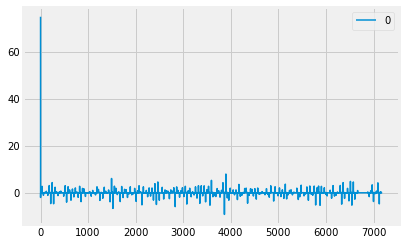

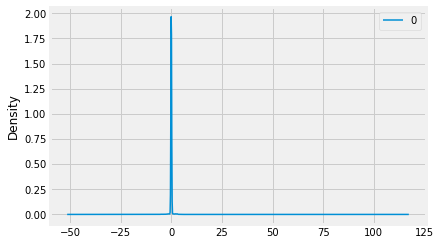

                 0
count  7184.000000
mean      0.010586
std       1.002313
min      -9.223689
25%      -0.049096
50%      -0.002299
75%       0.048598
max      75.100000


In [98]:
# Plot the residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [99]:
# Generate predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

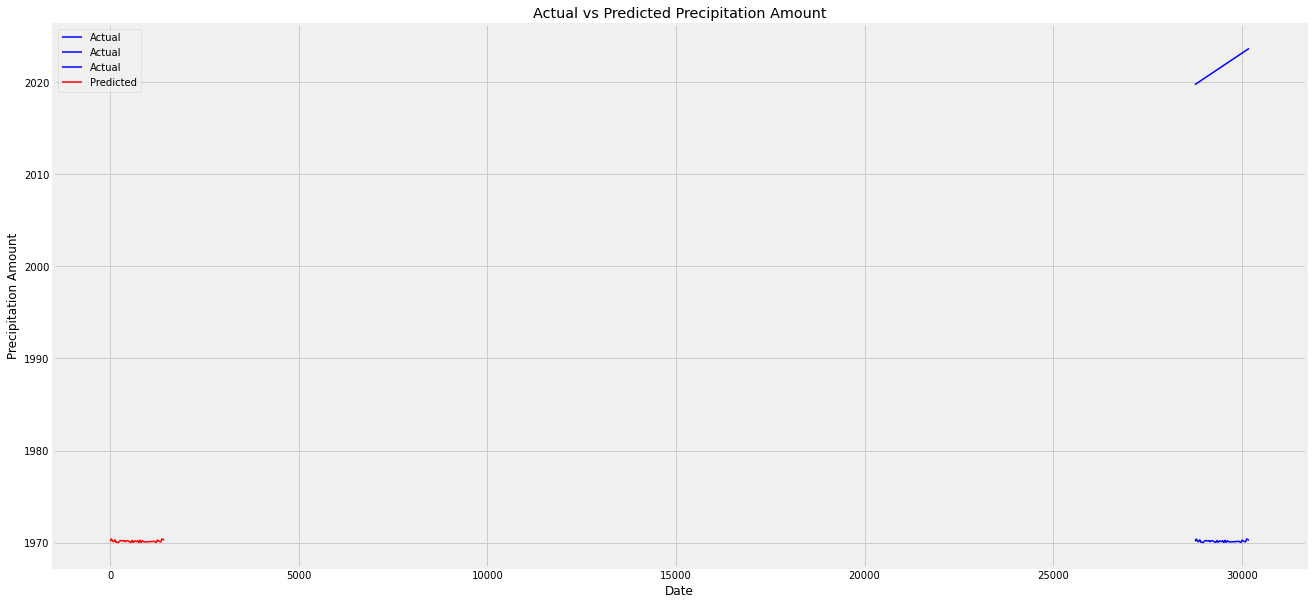

In [100]:
def plot_predictions(predictions, test):
    plt.figure(figsize=(20, 10))
    plt.plot(test, label='Actual', color='blue')
    plt.plot(predictions, label='Predicted', color='red')
    plt.xlabel('Date')
    plt.ylabel('Precipitation Amount')
    plt.title('Actual vs Predicted Precipitation Amount')
    plt.legend()
    plt.show()

plot_predictions(predictions, test)

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def calculate_metrics(predictions, test):
    rmse = np.sqrt(mean_squared_error(test['Precipitation_Amount'], predictions))
    mape = np.mean(np.abs((test['Precipitation_Amount'] - predictions) / test['Precipitation_Amount'])) * 100
    mae = mean_absolute_error(test['Precipitation_Amount'], predictions)
    r2 = r2_score(test['Precipitation_Amount'], predictions)
    
    print('Root Mean Squared Error (RMSE):', rmse)
    print('Mean Absolute Percentage Error (MAPE):', mape)
    print('Mean Absolute Error (MAE):', mae)
    print('R-squared (R2) Score:', r2)

calculate_metrics(predictions, test)

Root Mean Squared Error (RMSE): 0.4887711246540775
Mean Absolute Percentage Error (MAPE): 0.3187653700340567
Mean Absolute Error (MAE): 0.12100563422489188
R-squared (R2) Score: 0.9997148505514433


In [102]:
df2.head()

,new_date,Precipitation_Amount,forecast
23010,2004-01-01,75.100000,NaN
23011,2004-01-02,73.103226,NaN
23012,2004-01-03,71.106452,NaN
23013,2004-01-04,69.109677,NaN
23014,2004-01-05,67.112903,NaN


In [103]:
next_year_predictions = model_fit.predict(start=len(df2), end=len(df2) + 365, typ='levels')

next_year_dates = pd.date_range(start=df2['new_date'].max() + pd.Timedelta(days=1), periods=366)
next_year_predictions_df2 = pd.DataFrame(next_year_predictions, columns=['Predicted_Precipitation'])
next_year_predictions_df2['new_date'] = next_year_dates
next_year_predictions_df2.set_index('new_date', inplace=True)
print(next_year_predictions_df2)

            Predicted_Precipitation
new_date                           
2023-09-02               103.749163
2023-09-03               103.321078
2023-09-04               102.914597
2023-09-05               102.528631
2023-09-06               102.162143
...                             ...
2024-08-28                95.266755
2024-08-29                95.266755
2024-08-30                95.266755
2024-08-31                95.266755
2024-09-01                95.266755

[366 rows x 1 columns]


## LSTM

In [104]:
#pip install pandas numpy scikit-learn keras

In [105]:
df2.describe()

,new_date,Precipitation_Amount,forecast
count,7184,7184.000000,0.0
mean,2013-10-31 12:00:00,56.984020,NaN
min,2004-01-01 00:00:00,1.900000,NaN
25%,2008-11-30 18:00:00,36.834677,NaN
50%,2013-10-31 12:00:00,51.250000,NaN
75%,2018-10-01 06:00:00,72.263468,NaN
max,2023-09-01 00:00:00,165.700000,NaN
std,NaN,28.688296,NaN


In [106]:
df2['new_date'] = pd.to_datetime(df2['new_date'])
df2.set_index('new_date', inplace=True)

In [107]:
# Function to create input and target datasets
def create_dataset(data, timestep):
    X, y = [], []
    for i in range(len(data)-timestep-1):
        X.append(data[i:(i+timestep), 0])
        y.append(data[i + timestep, 0])
    return np.array(X), np.array(y)

In [108]:
# Convert data to numpy array
dataset = df2['Precipitation_Amount'].values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [109]:
# Set the timestep (how many days to look back)
timestep = 90

In [110]:
# Create input and target datasets
X, y = create_dataset(scaled_data, timestep)

In [111]:
# Split the data into training and testing sets
split_ratio = 0.8
split = int(split_ratio * len(X))

In [112]:
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [113]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [114]:
#pip install keras

In [115]:
#pip install scikit-learn

In [116]:
#pip install tensorflow

In [117]:
#pip install --upgrade statsmodels

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
forecast_years = 5 

In [ ]:
scaled_future_data = scaler.transform(dataset[-timestep:].reshape(-1, 1))